In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Data IMPORT

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

# Concatinate Train and test

In [6]:
survived=train_df[['Survived']]
df=train_df.drop(['Survived'],axis=1)
survived.to_csv('Survived.csv',index=False)
df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df=pd.concat([df,test_df],axis=0)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


# Name and Passenger ID not required

In [83]:
df=df.drop(['Name','PassengerId'],axis=1)


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Ticket    1309 non-null   object 
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 102.3+ KB


# Analyse the Data

In [85]:
x_num=['Pclass','Age','SibSp','Parch','Fare']
x_cat=['Sex','Ticket','Cabin','Embarked']

# Numeric data

In [86]:
df[x_num].describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [87]:
for i in x_num:
    print("{0:8} :{1} ".format(i,df[i].isna().sum()))

Pclass   :0 
Age      :263 
SibSp    :0 
Parch    :0 
Fare     :1 


In [88]:
df[x_num].isna().sum()

Pclass      0
Age       263
SibSp       0
Parch       0
Fare        1
dtype: int64

In [89]:
df.Age.mean()

29.881137667304014

In [90]:
df['Age']=df['Age'].fillna(df.Age.mean())

In [91]:
df[x_num].isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
dtype: int64

In [92]:
df['Fare']=df['Fare'].fillna(df.Fare.median())

In [93]:
df[x_num].isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [94]:
print(df[x_num].corr())

          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.366371  0.060832  0.018322 -0.558683
Age    -0.366371  1.000000 -0.190747 -0.130872  0.170851
SibSp   0.060832 -0.190747  1.000000  0.373587  0.160349
Parch   0.018322 -0.130872  0.373587  1.000000  0.221635
Fare   -0.558683  0.170851  0.160349  0.221635  1.000000


<AxesSubplot:>

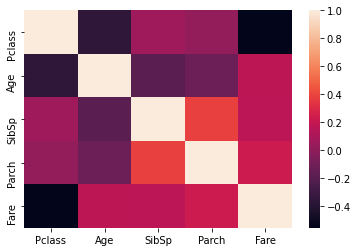

In [95]:
sns.heatmap((df[x_num].corr()))

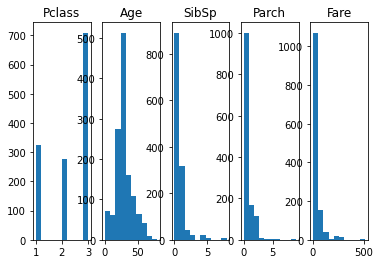

In [96]:

plt.subplot(1,5,1)
plt.hist(df[x_num[0]])
plt.title(x_num[0])
plt.subplot(1,5,2)
plt.hist(df[x_num[1]])
plt.title(x_num[1])
plt.subplot(1,5,3)
plt.hist(df[x_num[2]])
plt.title(x_num[2])
plt.subplot(1,5,4)
plt.hist(df[x_num[3]])
plt.title(x_num[3])
plt.subplot(1,5,5)
plt.hist(df[x_num[4]])
plt.title(x_num[4])
plt.show()

In [97]:

df.to_csv('df_num.csv',index=False)

In [103]:
df=pd.read_csv('df_num.csv')
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


# Normalizing

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [106]:
df['Age']=df.Age.apply(lambda z : (z-df.Age.min())/(df.Age.max()-df.Age.min()) )

In [107]:
df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,0.273456,1,0,A/5 21171,7.2500,NaN,S
1,1,female,0.473882,1,0,PC 17599,71.2833,C85,C


In [108]:
df['Fare']=df.Age.apply(lambda z : (z-df.Fare.min())/(df.Fare.max()-df.Fare.min()) )
df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,0.273456,1,0,A/5 21171,0.000534,NaN,S
1,1,female,0.473882,1,0,PC 17599,0.000925,C85,C


In [109]:
df.to_csv('NormalizedNum.csv',index=False)

# Categorical features


In [24]:
df=pd.read_csv('NormalizedNum.csv')
survived=pd.read_csv('Survived.csv')
x_cat=['Sex','Ticket','Cabin','Embarked']
df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,0.273456,1,0,A/5 21171,0.000534,NaN,S
1,1,female,0.473882,1,0,PC 17599,0.000925,C85,C
2,3,female,0.323563,0,0,STON/O2. 3101282,0.000632,NaN,S
3,1,female,0.436302,1,0,113803,0.000852,C123,S
4,3,male,0.436302,0,0,373450,0.000852,NaN,S


In [25]:
df.isna().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       2
dtype: int64

# SEX

In [26]:
print(pd.pivot_table(train_df,index='Survived',columns='Sex',values='Ticket',aggfunc='count'))

Sex       female  male
Survived              
0             81   468
1            233   109


In [27]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\nithin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


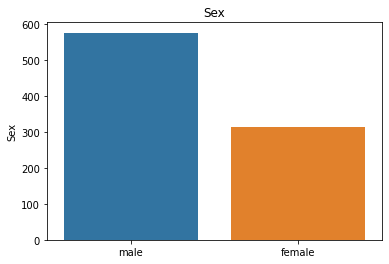

In [28]:
sns.barplot(train_df['Sex'].value_counts().index,train_df['Sex'].value_counts()).set_title('Sex')
plt.show()

In [29]:
df['Sex']=df.Sex.apply(lambda z : 0 if z.lower()== 'male' else 1)

In [30]:
df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,0.273456,1,0,A/5 21171,0.000534,NaN,S
1,1,1,0.473882,1,0,PC 17599,0.000925,C85,C
2,3,1,0.323563,0,0,STON/O2. 3101282,0.000632,NaN,S


# Pclass

In [31]:
print(pd.pivot_table(train_df,index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [32]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\Users\nithin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


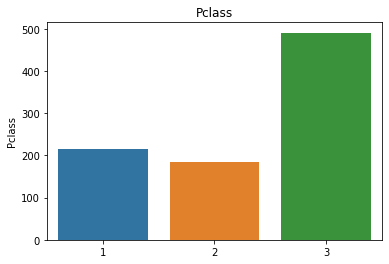

In [33]:
sns.barplot(train_df['Pclass'].value_counts().index,train_df['Pclass'].value_counts()).set_title('Pclass')
plt.show()

In [34]:
df['Pclass'].isna().sum()

0

# Embarked

In [35]:
df['Embarked'].isna().sum()

2

In [36]:
print(pd.pivot_table(train_df,index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [37]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\nithin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


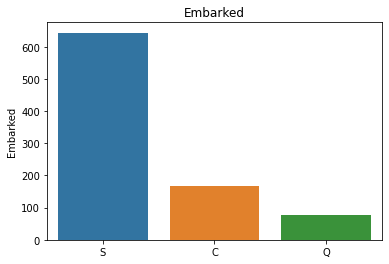

In [38]:
sns.barplot(train_df['Embarked'].value_counts().index,train_df['Embarked'].value_counts()).set_title('Embarked')
plt.show()

In [39]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [40]:
df.isna().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
dtype: int64

In [41]:
df['Embarked']=df['Embarked'].replace(to_replace=['S','C','Q'],value=[0,1,2])

In [42]:
df['Embarked'].value_counts()

0    916
1    270
2    123
Name: Embarked, dtype: int64

# Cabin

In [44]:
df.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
D                  4
F2                 4
                  ..
D38                1
B79                1
B24                1
C51                1
A32                1
Name: Cabin, Length: 186, dtype: int64

In [45]:
df.Cabin.isna().sum()

1014

In [46]:
df['Cabin']=df['Cabin'].fillna(0)


0                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
C22 C26               4
                   ... 
E68                   1
E39 E41               1
C28                   1
B10                   1
C130                  1
Name: Cabin, Length: 187, dtype: int64

In [50]:
df.Cabin.value_counts()

0                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
C22 C26               4
                   ... 
E68                   1
E39 E41               1
C28                   1
B10                   1
C130                  1
Name: Cabin, Length: 187, dtype: int64

In [52]:
df['Cabin']=df.Cabin.apply(lambda z: str(z)[0] )

df.Cabin.value_counts()

0    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [53]:
cl=['0','A','B','C','D','E','F','G','T']
cr=[0,1,2,3,4,5,6,7,8]
df['Cabin']=df['Cabin'].replace(cl,cr)
df.Cabin.value_counts()

0    1014
3      94
2      65
4      46
5      41
1      22
6      21
7       5
8       1
Name: Cabin, dtype: int64

In [54]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,0.273456,1,0,A/5 21171,0.000534,0,0
1,1,1,0.473882,1,0,PC 17599,0.000925,3,1
2,3,1,0.323563,0,0,STON/O2. 3101282,0.000632,0,0
3,1,1,0.436302,1,0,113803,0.000852,3,0
4,3,0,0.436302,0,0,373450,0.000852,0,0


In [56]:
df['Ticket']=df.Ticket.apply(lambda z : 1 if z.isnumeric() else 0)

In [59]:
df.to_csv('Final_df.csv',index=False)

In [58]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,0.273456,1,0,0,0.000534,0,0
1,1,1,0.473882,1,0,0,0.000925,3,1
2,3,1,0.323563,0,0,0,0.000632,0,0
3,1,1,0.436302,1,0,1,0.000852,3,0
4,3,0,0.436302,0,0,1,0.000852,0,0


# Export test and train data

In [62]:
df[0:891].to_csv('FinalTrain.csv',index=False)

In [63]:
df[891:].to_csv('FinalTest.csv',index=False)